In [33]:
import pandas as pd 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost


In [34]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
pd.set_option("display.max_rows", None)
stroke_df.head()
#stroke_df = stroke_df.astype({'age': 'int64'})
#stroke_df = stroke_df.astype({'avg_glucose_level': 'int64'})
stroke_df.isna().sum()
stroke_df['bmi'] = stroke_df['bmi'].fillna(0)
#stroke_df = stroke_df.astype({'bmi': 'int64'})
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [35]:
stroke_df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
stroke_df.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [38]:
stroke_df.drop(columns='id', inplace=True)
stroke_df.head()

KeyError: ignored

In [6]:
#replace bmi where value_counts is under 10 with other
#bmi_counts = stroke_df['bmi'].value_counts()
#bmi_lt_10 = bmi_counts.loc[bmi_counts < 10].index.tolist()
#bmi_0 = bmi_counts.loc[bmi_counts == 201].index.tolist()
#replace_bmi = bmi_lt_10 + bmi_0
#replace_bmi
#for x in replace_bmi:
    #stroke_df['bmi'] = stroke_df['bmi'].replace(x,'Other')

#stroke_df['bmi'].value_counts()

Other    963
28.7      41
28.4      38
27.6      37
27.7      37
26.1      37
26.7      37
27.3      36
23.4      36
27.0      35
26.9      34
26.4      34
25.1      34
25.5      33
23.5      31
24.8      31
28.9      31
30.3      30
29.4      30
28.3      30
26.5      30
31.4      30
22.2      30
26.6      29
28.1      29
24.2      29
27.5      29
29.1      29
25.3      28
27.1      28
24.1      28
28.0      28
32.3      28
24.0      28
27.9      28
31.5      27
24.9      27
28.6      27
21.5      27
29.7      27
30.9      27
23.0      27
26.2      27
25.0      27
28.5      27
30.0      27
24.3      26
28.8      26
29.5      26
30.1      26
24.5      26
29.6      26
29.2      26
29.0      26
31.1      26
29.9      26
25.4      26
22.7      25
26.0      25
22.8      25
28.2      25
32.8      25
33.1      25
20.1      25
27.2      24
23.9      24
23.6      24
30.5      24
32.1      24
35.8      24
31.8      24
25.9      24
25.8      24
30.7      23
20.4      23
26.3      23
29.8      23

In [32]:
#replace age where value_counts is under 40 with other
#age_counts = stroke_df['age'].value_counts()
#age_lt_40 = age_counts.loc[age_counts < 40].index.tolist()
#for x in age_lt_40:
    #stroke_df['age'] = stroke_df['age'].replace(x,'Other')

#stroke_df['age'].value_counts()
#stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,Other,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#replace glucose where value_counts is under 2 with other 
#maybe not necessary 

In [43]:
df_dummies = pd.get_dummies(stroke_df)
X = df_dummies.drop('stroke', axis=1)
y = df_dummies['stroke']
#X.columns = X.columns.astype(str)
df_dummies.columns



Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [45]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
len(X_train_scaled[0])

21

In [47]:
nn = tf.keras.models.Sequential()
number_of_input_features = len(X_train_scaled[0])
hidden_neuron1 = 100 
hidden_neuron2 = 50 
hidden_neuron3 = 30 

nn.add(tf.keras.layers.Dense(units = hidden_neuron1, activation='relu', input_dim = number_of_input_features))
nn.add(tf.keras.layers.Dense(units = hidden_neuron2, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units = hidden_neuron3, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,811
Trainable params: 8,811
Non-trainable params: 0
_________________________________________________________________


In [48]:
nn.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
120/120 [==============================] - 1s 1ms/step - loss: 0.2754 - accuracy: 0.9063
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9528
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9528
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.9528
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1584 - accuracy: 0.9528
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9528
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9528
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9528
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9528
Epoch 10/100
120/120 [==============================] - 0s 2ms/step - loss: 0.1453 - accura

In [50]:
xgb_model = xgboost.XGBClassifier()
xgb_model = xgb_model.fit(X_train_scaled, y_train)
predictions = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9397496087636933

In [51]:
forest_model = RandomForestClassifier(n_estimators= 398, random_state= 78)
forest_model = forest_model.fit(X_train_scaled, y_train)
predictions = forest_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
accuracy 


0.9460093896713615

In [52]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1206,    4],
       [  65,    3]])

In [56]:
## Classification Report
from sklearn.metrics import classification_report
target_names = ["0", "1"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1210
           1       0.43      0.04      0.08        68

    accuracy                           0.95      1278
   macro avg       0.69      0.52      0.53      1278
weighted avg       0.92      0.95      0.92      1278



In [54]:
# Random Forests in sklearn will automatically calculate feature importance
importances = forest_model.feature_importances_
# We can sort the features by their importance
sorted(zip(forest_model.feature_importances_, X.columns), reverse=True)

[(0.25652296596709884, 'avg_glucose_level'),
 (0.23569233952750934, 'age'),
 (0.22827131003472032, 'bmi'),
 (0.028755609260477964, 'hypertension'),
 (0.026196890609453825, 'heart_disease'),
 (0.021521316564622372, 'smoking_status_never smoked'),
 (0.019745799313665054, 'work_type_Private'),
 (0.01950588850799376, 'smoking_status_formerly smoked'),
 (0.01948376669662403, 'Residence_type_Urban'),
 (0.01873728731883947, 'gender_Male'),
 (0.01871024049157455, 'Residence_type_Rural'),
 (0.01822121538041874, 'gender_Female'),
 (0.01820523998895487, 'smoking_status_smokes'),
 (0.01817324619989738, 'work_type_Self-employed'),
 (0.016935181798067085, 'smoking_status_Unknown'),
 (0.013559270798717233, 'work_type_Govt_job'),
 (0.01049180219711391, 'ever_married_Yes'),
 (0.0099067592123901, 'ever_married_No'),
 (0.0013574795107050392, 'work_type_children'),
 (3.987493770497151e-06, 'work_type_Never_worked'),
 (2.403127385724183e-06, 'gender_Other')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

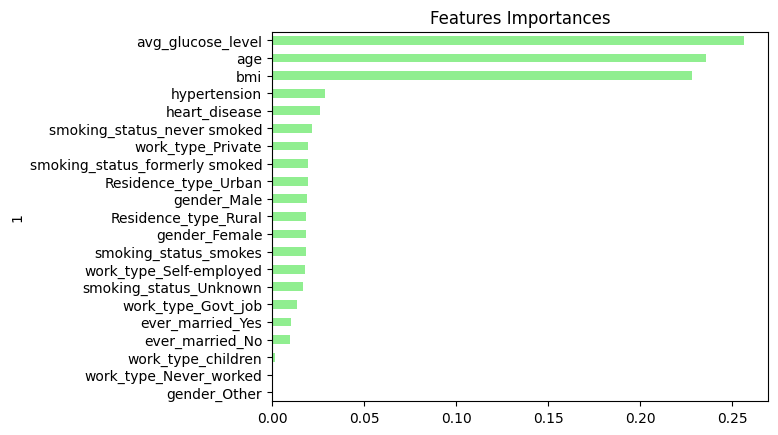

In [55]:
importances_df = pd.DataFrame(sorted(zip(forest_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)